In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV



In [5]:
df = pd.read_csv("E:/Mtech/Sem2/ml 2/project/ml2 project/adult.csv")
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [6]:
num_of_records=df.shape[0]
n_greater_50k=df[df['class']==' >50K'].shape[0]
n_at_most_50k=df[df['class']==' <=50K'].shape[0]
greater_percentage=(n_greater_50k/num_of_records)*100
print('Total number of records: {}'.format(num_of_records))
print('Individual making more than 50K: {}'.format(n_greater_50k))
print('Individual making at most 50K: {}'.format(n_at_most_50k))
print('% Individual making more than 50K: {}'.format(greater_percentage))

Total number of records: 48842
Individual making more than 50K: 11687
Individual making at most 50K: 37155
% Individual making more than 50K: 23.928176569346054


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,189664.134597,10.078089,1079.067626,87.502314,40.422382
std,13.710510,105604.025423,2.570973,7452.019058,403.004552,12.391444
min,17.000000,12285.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117550.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178144.500000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,237642.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,1490400.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.shape

(48842, 15)

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [11]:
df.isin([' ?']).sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [12]:
col_names = df.columns
num_data = df.shape[0]
for c in col_names:
    num_non = df[c].isin([" ?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




In [13]:
df = df[df["workclass"] != " ?"]
df = df[df["occupation"] != " ?"]
df = df[df["native-country"] != " ?"]

df.shape

(45222, 15)

In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,189734.734311,10.118460,1101.430344,88.595418,40.938017
std,13.217870,105639.195134,2.552881,7506.430084,404.956092,12.007508
min,17.000000,13492.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,117388.250000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,178316.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,237926.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,1490400.000000,16.000000,99999.000000,4356.000000,99.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145112B57C0>,
      dtype=object)

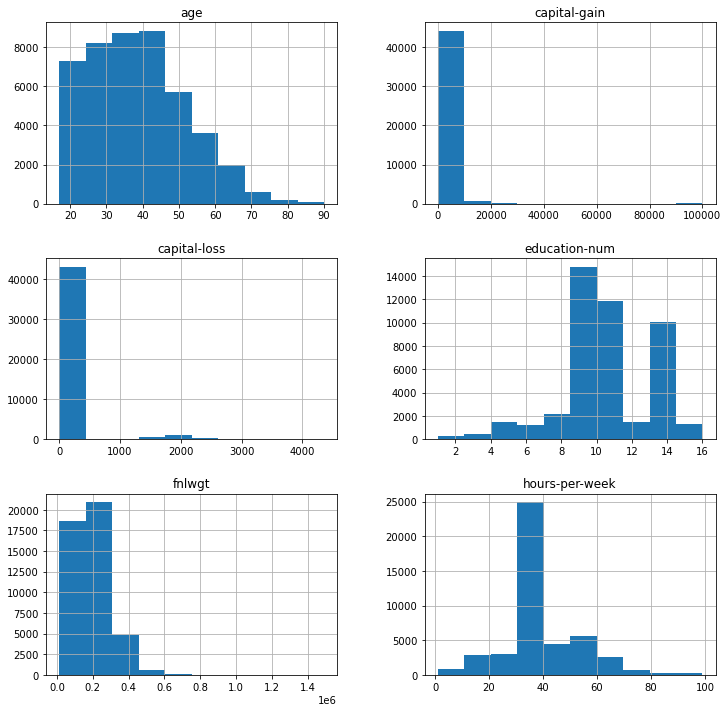

In [15]:
from matplotlib import rcParams
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].hist()

#Can visualise that data such as capital gain, capitaln loss, fnlwgt is right skewed an other columns can be grouped for better visualisation

In [16]:
#Mapping binary values to the expected output

df['class']=df['class'].map({' <=50K': 0, ' >50K': 1})

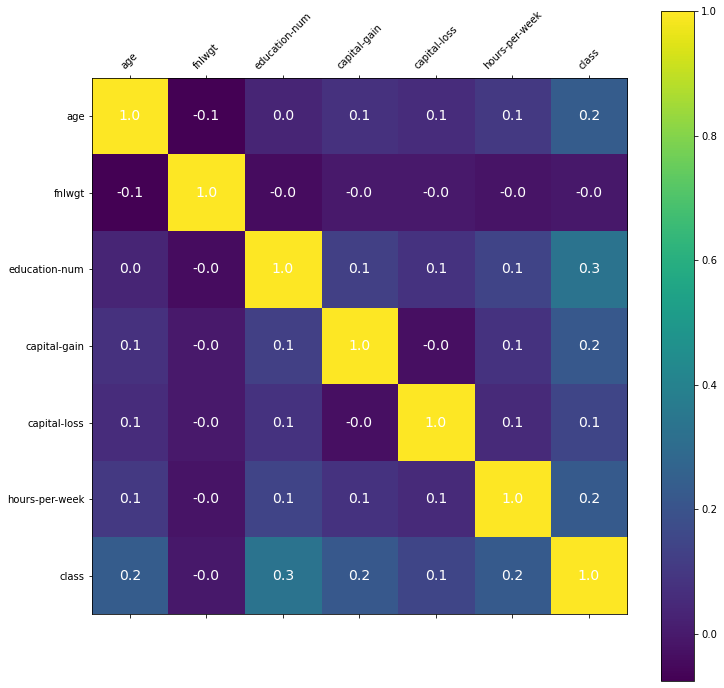

In [17]:
#Ploting the correlation between the output(class) and individual features

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [18]:
#Since it has 0 correlation, it can be dropped

df.drop(['fnlwgt'], axis = 1, inplace = True)

In [19]:
dataset=df.copy()

In [20]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

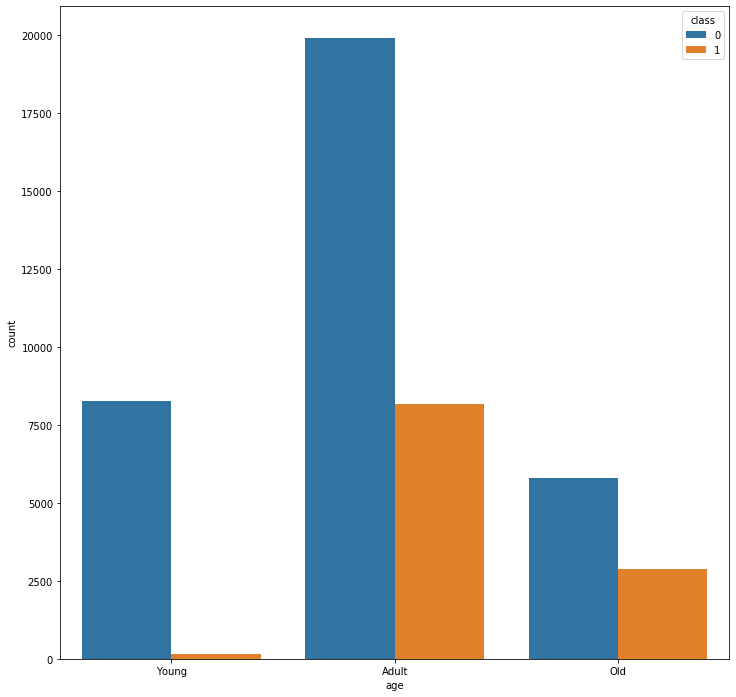

In [18]:
sns.countplot(x = 'age', hue ='class' , data = dataset)

In [19]:
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income

dataset['Capital Diff'] = dataset['capital-gain'] - dataset['capital-loss']
dataset.drop(['capital-gain'], axis = 1, inplace = True)
dataset.drop(['capital-loss'], axis = 1, inplace = True)

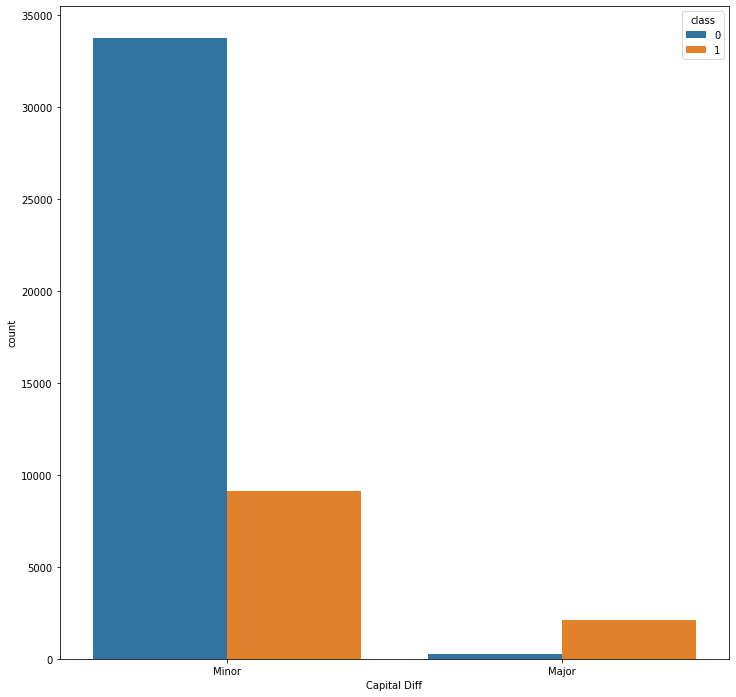

In [20]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x ='Capital Diff' , hue = 'class', data = dataset)

In [21]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income

dataset['Hours per Week'] = pd.cut(dataset['hours-per-week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

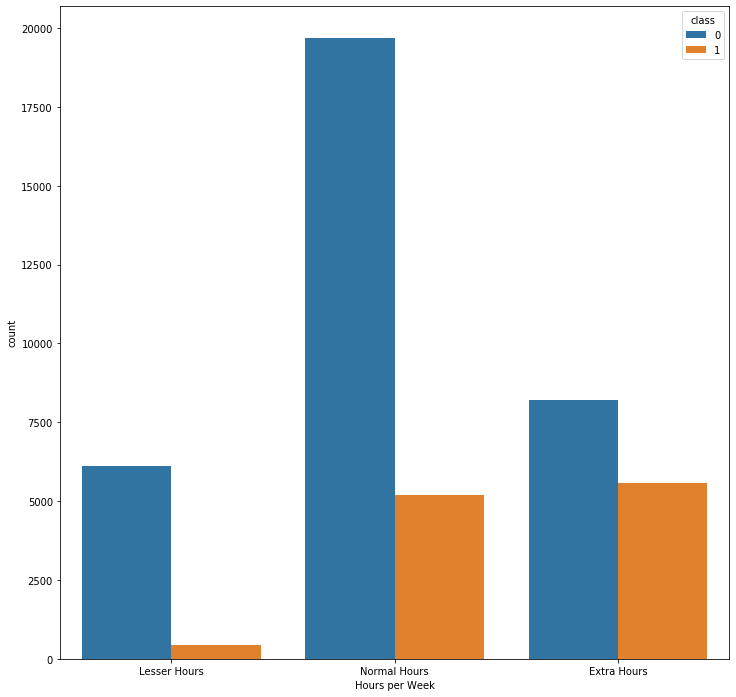

In [22]:
sns.countplot(x ='Hours per Week' , hue = 'class', data = dataset)

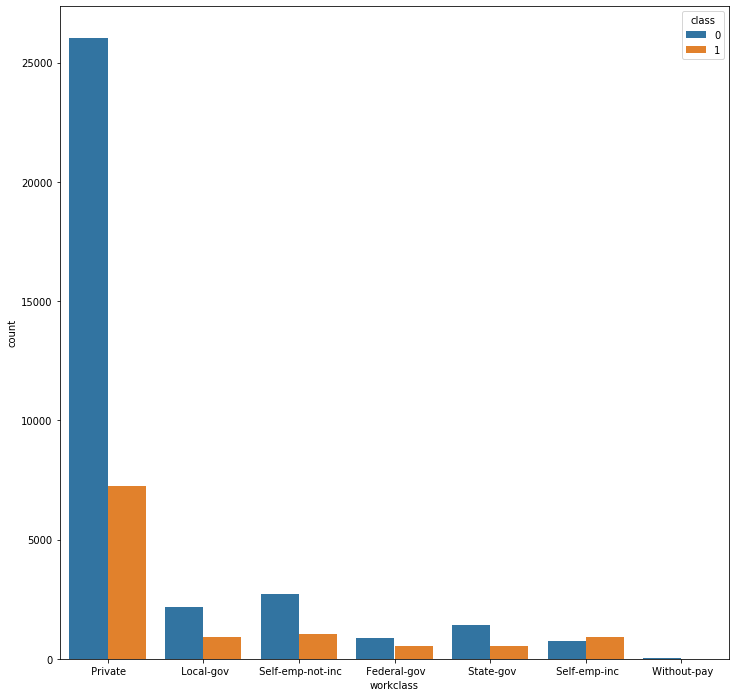

In [23]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'workclass', hue = 'class', data = dataset)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

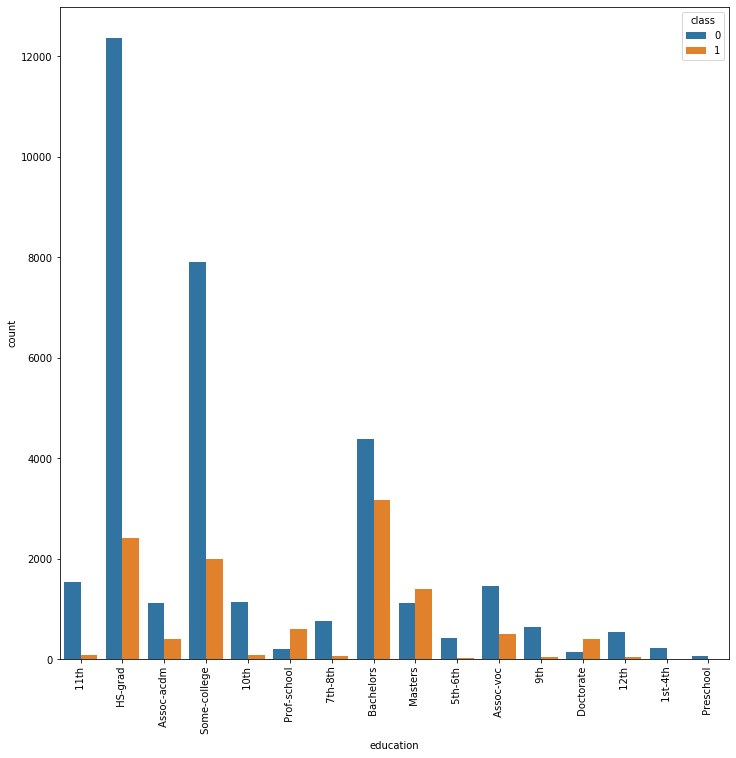

In [24]:
#Plot of education corresponding to income

sns.countplot(x ='education' , hue = 'class', data = dataset)
plt.xticks(rotation=90)

In [25]:
#Combining the lower grades of education together

df.drop(['education-num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['education'].value_counts()

 HS-grad         14783
 Some-college     9899
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

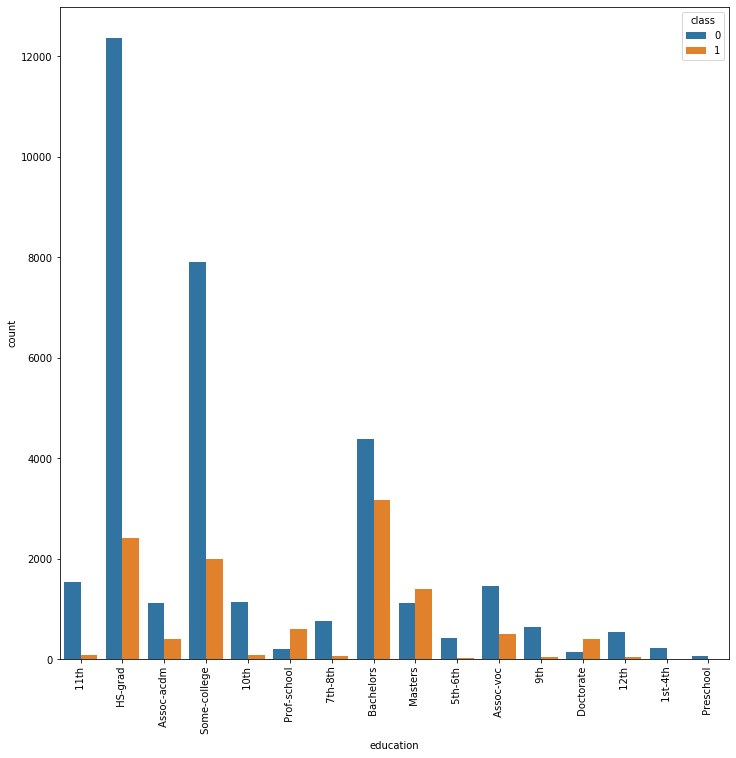

In [26]:
sns.countplot(x ='education' , hue = 'class', data = dataset)
plt.xticks(rotation=90)

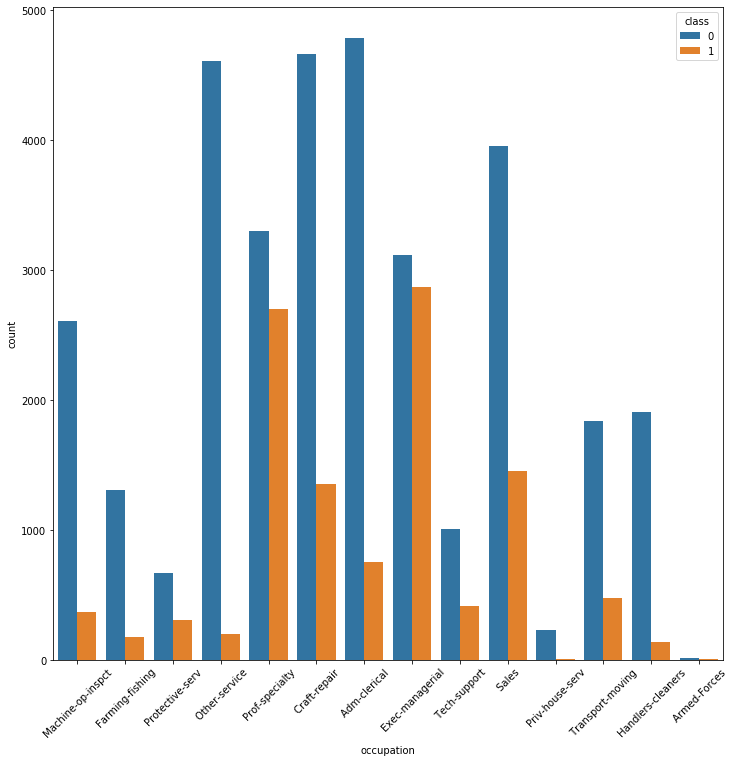

In [27]:
#Plot of occupation corresponding to the income

plt.xticks(rotation = 45)
sns.countplot(x = 'occupation', hue = 'class', data = dataset)

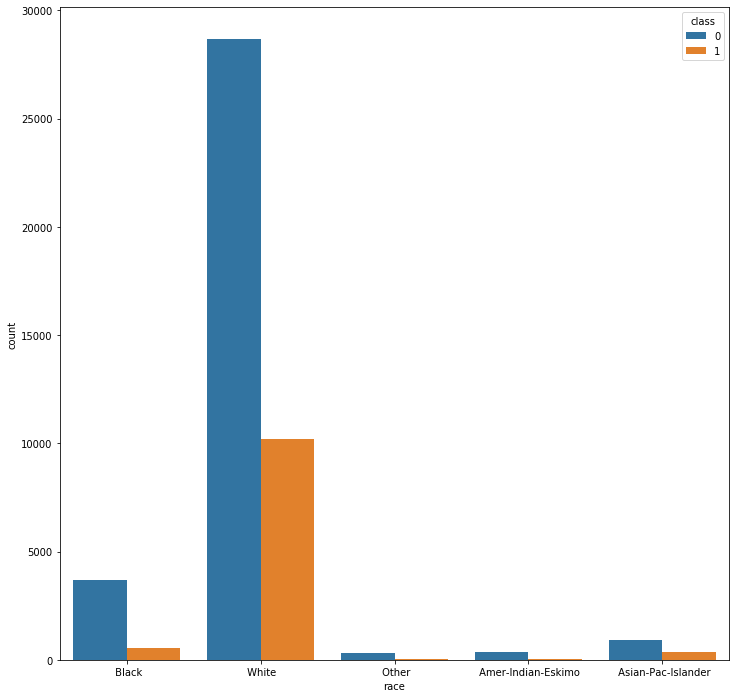

In [28]:
sns.countplot(x ='race' , hue = 'class', data = dataset)

In [29]:
#Since majority of race is white, the rest of races can be combined together to form a new group

df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

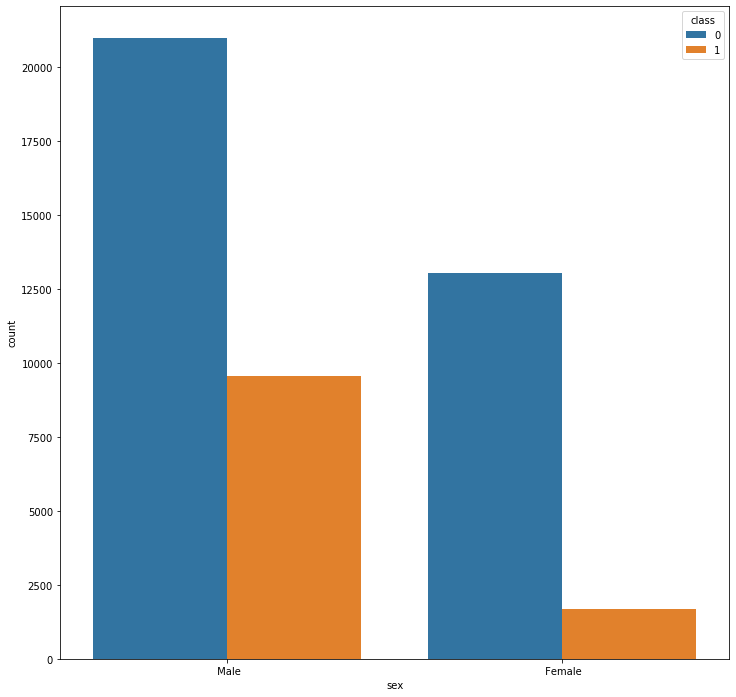

In [30]:
#Plot of sex corresponding to income

sns.countplot(x ='sex' , hue = 'class', data = dataset)

In [31]:
count = dataset['native-country'].value_counts()
count

 United-States                 41292
 Mexico                          903
 Philippines                     283
 Germany                         193
 Puerto-Rico                     175
 Canada                          163
 El-Salvador                     147
 India                           147
 Cuba                            133
 England                         119
 China                           113
 Jamaica                         103
 South                           101
 Italy                           100
 Dominican-Republic               97
 Japan                            89
 Guatemala                        86
 Vietnam                          83
 Columbia                         82
 Poland                           81
 Haiti                            69
 Portugal                         62
 Iran                             56
 Taiwan                           55
 Greece                           49
 Nicaragua                        48
 Peru                             45
 

Text(0.5, 1.0, 'Count from each Country')

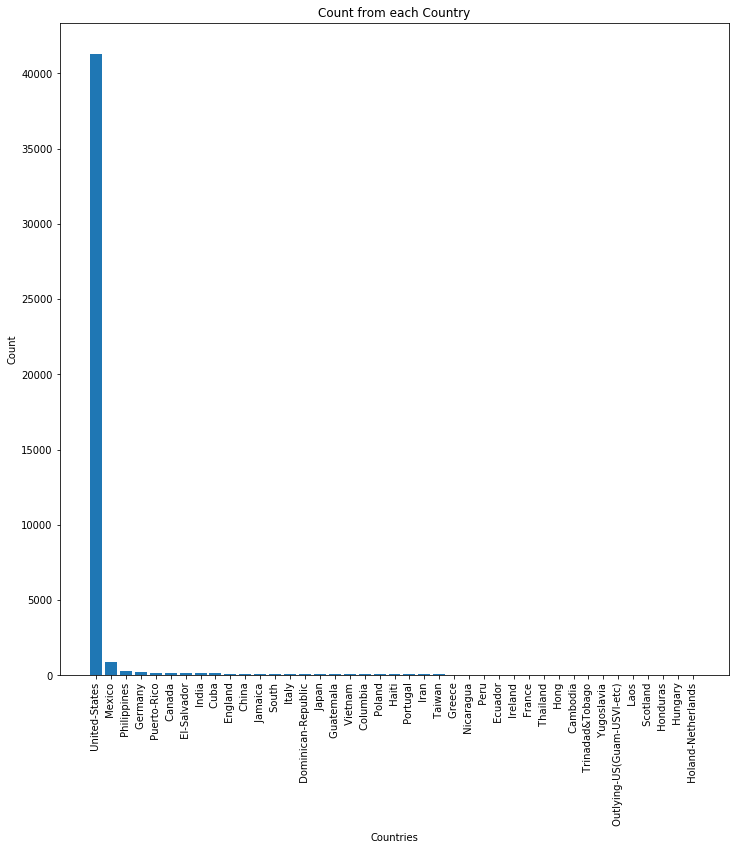

In [32]:
#Plot of Country corresponding to income


plt.bar(count.index, count.values)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')

In [33]:
#Combining all other into one class

countries = np.array(dataset['native-country'].unique())
countries = np.delete(countries, 0)

In [34]:
dataset['native-country'].replace(countries, 'Other', inplace = True)
df['native-country'].replace(countries, 'Other', inplace = True)

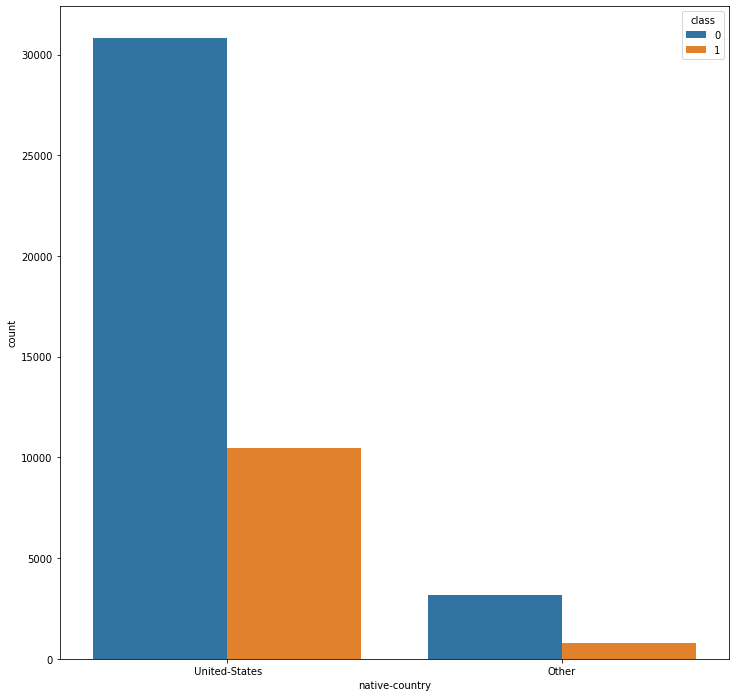

In [35]:
sns.countplot(x = 'native-country', hue = 'class', data = dataset)

In [22]:
df=pd.read_csv("E:/Mtech/Sem2/ml 2/project/ml2 project/adult.csv")

In [23]:
#Mapping binary values to the expected output

df['class']=df['class'].map({' <=50K': 0, ' >50K': 1})

In [24]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [25]:
# store the target variable 'Chance of Admit' in a dataframe 'df_target'
df_target = df['class']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = df.drop('class', axis = 1)

In [26]:
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [27]:
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.head(2)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States


In [28]:
df_num1=df_num.drop('fnlwgt',axis=1)
df_num1.head(2)

,age,education-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50


In [29]:
df_cat['sex']=pd.get_dummies(df_cat['sex'],drop_first=True)

In [30]:
df_cat.head(2)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,1,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,1,United-States


In [31]:
race_dum=pd.get_dummies(df_cat['race'],drop_first=True)
df_cat=df_cat.merge(race_dum,left_index=True,right_index=True)
df_cat.drop('race',axis=1,inplace=True)
df_cat.head(2)

,workclass,education,marital-status,occupation,relationship,sex,native-country,Asian-Pac-Islander,Black,Other,White
0,Private,11th,Never-married,Machine-op-inspct,Own-child,1,United-States,0,1,0,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,1,United-States,0,0,0,1


In [32]:
categorical_cols=df_cat.columns
for col in categorical_cols:
    b, c = np.unique(df_cat[col], return_inverse=True) 
    df_cat[col] = c

df_cat.head()

,workclass,education,marital-status,occupation,relationship,sex,native-country,Asian-Pac-Islander,Black,Other,White
0,4,1,4,7,3,1,39,0,1,0,0
1,4,11,2,5,0,1,39,0,0,0,1
2,2,7,2,11,0,1,39,0,0,0,1
3,4,15,2,7,0,1,39,0,1,0,0
4,0,15,4,0,3,0,39,0,0,0,1


In [33]:
X = pd.concat([df_num1, df_cat], axis = 1)

# display first five observations
X.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,sex,native-country,Asian-Pac-Islander,Black,Other,White
0,25,7,0,0,40,4,1,4,7,3,1,39,0,1,0,0
1,38,9,0,0,50,4,11,2,5,0,1,39,0,0,0,1
2,28,12,0,0,40,2,7,2,11,0,1,39,0,0,0,1
3,44,10,7688,0,40,4,15,2,7,0,1,39,0,1,0,0
4,18,10,0,0,30,0,15,4,0,3,0,39,0,0,0,1


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (39073, 16)
y_train (39073,)
X_test (9769, 16)
y_test (9769,)


In [35]:
y=df_target.copy()

In [36]:
X, X_val, y, y_val = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=False)

In [47]:
class Optimizer:
    def __init__(self, metric, trials=30):
        self.metric = metric
        self.trials = trials
        
        
    def objective(self, trial):
        model = create_model(trial)
        model.fit(X, y)
        preds = model.predict(X_val)
        if self.metric == 'acc':
            return accuracy_score(y_val, preds)
        else:
            return f1_score(y_val, preds)
            
    def optimize(self):
        study = optuna.create_study(direction="maximize")
        study.optimize(self.objective, n_trials=self.trials)
        return study.best_params

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [48]:
rf = RandomForestClassifier(random_state=666)
rf.fit(X, y)
preds = rf.predict(X_val)

print('Random Forest accuracy: ', accuracy_score(y_val, preds))
print('Random Forest f1-score: ', f1_score(y_val, preds))

def create_model(trial):
    max_depth = trial.suggest_int("max_depth", 2, 6)
    n_estimators = trial.suggest_int("n_estimators", 2, 150)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    model = RandomForestClassifier(
        min_samples_leaf=min_samples_leaf, 
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        random_state=666
    )
    return model

optimizer = Optimizer('f1')
rf_f1_params = optimizer.optimize()
rf_f1_params['random_state'] = 666
rf_f1 = RandomForestClassifier(**rf_f1_params)
rf_f1.fit(X, y)
preds = rf_f1.predict(X_val)

print('Optimized on F1 score')
print('Optimized Random Forest: ', accuracy_score(y_val, preds))
print('Optimized Random Forest f1-score: ', f1_score(y_val, preds))

optimizer = Optimizer('acc')
rf_acc_params = optimizer.optimize()
rf_acc_params['random_state'] = 666
rf_acc = RandomForestClassifier(**rf_acc_params)
rf_acc.fit(X, y)
preds = rf_acc.predict(X_val)

print('Optimized on accuracy')
print('Optimized Random Forest: ', accuracy_score(y_val, preds))
print('Optimized Random Forest f1-score: ', f1_score(y_val, preds))

[I 2020-11-14 15:14:59,107] A new study created in memory with name: no-name-4339cde5-9897-4b19-9fc8-ba459a9cf2a1


Random Forest accuracy:  0.8539256832838571
Random Forest f1-score:  0.6854749834692528


[I 2020-11-14 15:15:00,628] Trial 0 finished with value: 0.30682617874736107 and parameters: {'max_depth': 2, 'n_estimators': 113, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.30682617874736107.
[I 2020-11-14 15:15:01,323] Trial 1 finished with value: 0.6515566625155667 and parameters: {'max_depth': 6, 'n_estimators': 35, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6515566625155667.
[I 2020-11-14 15:15:01,686] Trial 2 finished with value: 0.5032679738562091 and parameters: {'max_depth': 3, 'n_estimators': 26, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6515566625155667.
[I 2020-11-14 15:15:02,114] Trial 3 finished with value: 0.34102652428522223 and parameters: {'max_depth': 2, 'n_estimators': 37, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.6515566625155667.
[I 2020-11-14 15:15:03,682] Trial 4 finished with value: 0.6336734693877552 and parameters: {'max_depth': 5, 'n_estimators': 92, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.65155666

Optimized on F1 score
Optimized Random Forest:  0.8575084450813799
Optimized Random Forest f1-score:  0.6521739130434783


[I 2020-11-14 15:15:57,229] Trial 0 finished with value: 0.8530044016787798 and parameters: {'max_depth': 5, 'n_estimators': 134, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.8530044016787798.
[I 2020-11-14 15:15:58,417] Trial 1 finished with value: 0.7975227761285699 and parameters: {'max_depth': 2, 'n_estimators': 95, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8530044016787798.
[I 2020-11-14 15:15:59,180] Trial 2 finished with value: 0.8372402497696796 and parameters: {'max_depth': 3, 'n_estimators': 51, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.8530044016787798.
[I 2020-11-14 15:16:00,084] Trial 3 finished with value: 0.8560753403623708 and parameters: {'max_depth': 6, 'n_estimators': 32, 'min_samples_leaf': 4}. Best is trial 3 with value: 0.8560753403623708.
[I 2020-11-14 15:16:01,760] Trial 4 finished with value: 0.8531067663015662 and parameters: {'max_depth': 5, 'n_estimators': 91, 'min_samples_leaf': 10}. Best is trial 3 with value: 0.85607534036

Optimized on accuracy
Optimized Random Forest:  0.8575084450813799
Optimized Random Forest f1-score:  0.6533864541832668


In [51]:
xgb = XGBClassifier(random_state=666)
xgb.fit(X, y)
preds = xgb.predict(X_val)

print('XGBoost accuracy: ', accuracy_score(y_val, preds))
print('XGBoost f1-score: ', f1_score(y_val, preds))

def create_model(trial):
    max_depth = trial.suggest_int("max_depth", 2, 6)
    n_estimators = trial.suggest_int("n_estimators", 1, 150)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0000001, 1)
    gamma = trial.suggest_uniform('gamma', 0.0000001, 1)
    model = XGBClassifier(
        learning_rate=learning_rate, 
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        gamma=gamma, 
        random_state=666
    )
    return model

optimizer = Optimizer('f1')
xgb_f1_params = optimizer.optimize()
xgb_f1_params['random_state'] = 666
xgb_f1 = XGBClassifier(**xgb_f1_params)
xgb_f1.fit(X, y)
preds = xgb_f1.predict(X_val)

print('Optimized on F1 score')
print('Optimized XGBoost accuracy: ', accuracy_score(y_val, preds))
print('Optimized XGBoost f1-score: ', f1_score(y_val, preds))

optimizer = Optimizer('acc')
xgb_acc_params = optimizer.optimize()
xgb_acc_params['random_state'] = 666
xgb_acc = XGBClassifier(**xgb_acc_params)
xgb_acc.fit(X, y)
preds = xgb_acc.predict(X_val)

print('Optimized on accuracy')
print('Optimized XGBoost accuracy: ', accuracy_score(y_val, preds))
print('Optimized XGBoost f1-score: ', f1_score(y_val, preds))

[I 2020-11-14 15:17:13,192] A new study created in memory with name: no-name-0b1cd942-19af-452d-8a21-f934c53ac768


XGBoost accuracy:  0.8772648172791483
XGBoost f1-score:  0.7295285359801489


[I 2020-11-14 15:17:14,642] Trial 0 finished with value: 0.7204202832343535 and parameters: {'max_depth': 4, 'n_estimators': 79, 'learning_rate': 0.2624613896323886, 'gamma': 0.2442332640825783}. Best is trial 0 with value: 0.7204202832343535.
[I 2020-11-14 15:17:16,637] Trial 1 finished with value: 0.7245333932988531 and parameters: {'max_depth': 6, 'n_estimators': 51, 'learning_rate': 0.6387410823602511, 'gamma': 0.3358318144282601}. Best is trial 1 with value: 0.7245333932988531.
[I 2020-11-14 15:17:17,666] Trial 2 finished with value: 0.6645430041656457 and parameters: {'max_depth': 5, 'n_estimators': 29, 'learning_rate': 0.10550480376527384, 'gamma': 0.6181616399003891}. Best is trial 1 with value: 0.7245333932988531.
[I 2020-11-14 15:17:20,611] Trial 3 finished with value: 0.7115342041177772 and parameters: {'max_depth': 6, 'n_estimators': 119, 'learning_rate': 0.9632404828001749, 'gamma': 0.9239726716738778}. Best is trial 1 with value: 0.7245333932988531.
[I 2020-11-14 15:17:22

Optimized on F1 score
Optimized XGBoost accuracy:  0.8781860988842256
Optimized XGBoost f1-score:  0.7304032623470774


[I 2020-11-14 15:18:27,295] Trial 0 finished with value: 0.8605793837649708 and parameters: {'max_depth': 2, 'n_estimators': 85, 'learning_rate': 0.15046649299044454, 'gamma': 0.6428311132401684}. Best is trial 0 with value: 0.8605793837649708.
[I 2020-11-14 15:18:29,628] Trial 1 finished with value: 0.8747057017094892 and parameters: {'max_depth': 3, 'n_estimators': 123, 'learning_rate': 0.6716383561441776, 'gamma': 0.2814132408692107}. Best is trial 1 with value: 0.8747057017094892.
[I 2020-11-14 15:18:31,864] Trial 2 finished with value: 0.8725560446309756 and parameters: {'max_depth': 6, 'n_estimators': 72, 'learning_rate': 0.6437854634454709, 'gamma': 0.04188688881889207}. Best is trial 1 with value: 0.8747057017094892.
[I 2020-11-14 15:18:32,905] Trial 3 finished with value: 0.8756269833145665 and parameters: {'max_depth': 4, 'n_estimators': 41, 'learning_rate': 0.7347377183748027, 'gamma': 0.06754576856387116}. Best is trial 3 with value: 0.8756269833145665.
[I 2020-11-14 15:18:

Optimized on accuracy
Optimized XGBoost accuracy:  0.8776742757702938
Optimized XGBoost f1-score:  0.7281001137656427


In [54]:
lgb = LGBMClassifier(random_state=666)
lgb.fit(X, y)
preds = lgb.predict(X_val)

print('LightGBM accuracy: ', accuracy_score(y_val, preds))
print('LightGBM f1-score: ', f1_score(y_val, preds))


def create_model(trial):
    max_depth = trial.suggest_int("max_depth", 2, 6)
    n_estimators = trial.suggest_int("n_estimators", 1, 150)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0000001, 1)
    num_leaves = trial.suggest_int("num_leaves", 2, 3000)
    min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
    model = LGBMClassifier(
        learning_rate=learning_rate, 
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        num_leaves=num_leaves, 
        min_child_samples=min_child_samples,
        random_state=666
    )
    return model

optimizer = Optimizer('f1')
lgb_f1_params = optimizer.optimize()
lgb_f1_params['random_state'] = 666
lgb_f1 = LGBMClassifier(**lgb_f1_params)
lgb_f1.fit(X, y)
preds = lgb_f1.predict(X_val)

print('Optimized on F1-score')
print('Optimized LightGBM accuracy: ', accuracy_score(y_val, preds))
print('Optimized LightGBM f1-score: ', f1_score(y_val, preds))

optimizer = Optimizer('acc')
lgb_acc_params = optimizer.optimize()
lgb_acc_params['random_state'] = 666
lgb_acc = LGBMClassifier(**lgb_acc_params)
lgb_acc.fit(X, y)
preds = lgb_acc.predict(X_val)

print('Optimized on accuracy')
print('Optimized LightGBM accuracy: ', accuracy_score(y_val, preds))
print('Optimized LightGBM f1-score: ', f1_score(y_val, preds))


[I 2020-11-14 15:23:24,479] A new study created in memory with name: no-name-0a429707-e98b-48ad-8c49-226ba77215dc


LightGBM accuracy:  0.8762411710512846
LightGBM f1-score:  0.7254144901203724


[I 2020-11-14 15:23:25,078] Trial 0 finished with value: 0.7196007259528131 and parameters: {'max_depth': 5, 'n_estimators': 66, 'learning_rate': 0.47029696950718436, 'num_leaves': 1533, 'min_child_samples': 7}. Best is trial 0 with value: 0.7196007259528131.
[I 2020-11-14 15:23:25,343] Trial 1 finished with value: 0.7190704032809295 and parameters: {'max_depth': 4, 'n_estimators': 29, 'learning_rate': 0.8206968547675637, 'num_leaves': 694, 'min_child_samples': 190}. Best is trial 0 with value: 0.7196007259528131.
[I 2020-11-14 15:23:25,623] Trial 2 finished with value: 0.7108045977011493 and parameters: {'max_depth': 2, 'n_estimators': 65, 'learning_rate': 0.5266155162004467, 'num_leaves': 2775, 'min_child_samples': 70}. Best is trial 0 with value: 0.7196007259528131.
[I 2020-11-14 15:23:26,011] Trial 3 finished with value: 0.7058550185873605 and parameters: {'max_depth': 3, 'n_estimators': 102, 'learning_rate': 0.14275506772315769, 'num_leaves': 2033, 'min_child_samples': 114}. Best 

Optimized on F1-score
Optimized LightGBM accuracy:  0.8774695465247211
Optimized LightGBM f1-score:  0.7288788221970556


[I 2020-11-14 15:23:39,066] Trial 0 finished with value: 0.8743986078411301 and parameters: {'max_depth': 4, 'n_estimators': 69, 'learning_rate': 0.91069778926985, 'num_leaves': 1418, 'min_child_samples': 142}. Best is trial 0 with value: 0.8743986078411301.
[I 2020-11-14 15:23:40,008] Trial 1 finished with value: 0.8691780120790255 and parameters: {'max_depth': 5, 'n_estimators': 144, 'learning_rate': 0.8488081845268095, 'num_leaves': 2606, 'min_child_samples': 52}. Best is trial 0 with value: 0.8743986078411301.
[I 2020-11-14 15:23:40,552] Trial 2 finished with value: 0.8767529941652165 and parameters: {'max_depth': 6, 'n_estimators': 69, 'learning_rate': 0.38848200831311874, 'num_leaves': 1160, 'min_child_samples': 100}. Best is trial 2 with value: 0.8767529941652165.
[I 2020-11-14 15:23:41,150] Trial 3 finished with value: 0.8753198894462074 and parameters: {'max_depth': 6, 'n_estimators': 69, 'learning_rate': 0.7206662160596365, 'num_leaves': 2711, 'min_child_samples': 166}. Best 

Optimized on accuracy
Optimized LightGBM accuracy:  0.8789026512437301
Optimized LightGBM f1-score:  0.7321711568938194


In [58]:
lr = LogisticRegression(random_state=666)
lr.fit(X, y)
preds = lr.predict(X_val)

print('Logistic Regression: ', accuracy_score(y_val, preds))
print('Logistic Regression f1-score: ', f1_score(y_val, preds))

Logistic Regression:  0.8059166751970519
Logistic Regression f1-score:  0.49493873201917954


In [59]:
dt = DecisionTreeClassifier(random_state=666)
dt.fit(X, y)
preds = dt.predict(X_val)

print('Decision Tree accuracy: ', accuracy_score(y_val, preds))
print('Decision Tree f1-score: ', f1_score(y_val, preds))

def create_model(trial):
    max_depth = trial.suggest_int("max_depth", 2, 6)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 16)
    min_weight_fraction_leaf = trial.suggest_uniform('min_weight_fraction_leaf', 0.0, 0.5)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    model = DecisionTreeClassifier(
        min_samples_split=min_samples_split, 
        min_weight_fraction_leaf=min_weight_fraction_leaf, 
        max_depth=max_depth, 
        min_samples_leaf=min_samples_leaf, 
        random_state=666
    )
    return model

optimizer = Optimizer('f1')
dt_f1_params = optimizer.optimize()
dt_f1_params['random_state'] = 666
dt_f1 = DecisionTreeClassifier(**dt_f1_params)
dt_f1.fit(X, y)
preds = dt_f1.predict(X_val)

print('Optimized on F1-score')
print('Optimized Decision Tree accuracy: ', accuracy_score(y_val, preds))
print('Optimized Decision Tree f1-score: ', f1_score(y_val, preds))

optimizer = Optimizer('acc')
dt_acc_params = optimizer.optimize()
dt_acc_params['random_state'] = 666
dt_acc = DecisionTreeClassifier(**dt_acc_params)
dt_acc.fit(X, y)
preds = dt_acc.predict(X_val)

print('Optimized on accuracy')
print('Optimized Decision Tree accuracy: ', accuracy_score(y_val, preds))
print('Optimized Decision Tree f1-score: ', f1_score(y_val, preds))

[I 2020-11-14 15:25:50,557] A new study created in memory with name: no-name-37aa605d-9f58-4c2c-b27e-2580bfbec43b
[I 2020-11-14 15:25:50,620] Trial 0 finished with value: 0.5017881705639615 and parameters: {'max_depth': 2, 'min_samples_split': 11, 'min_weight_fraction_leaf': 0.06903021745544208, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.5017881705639615.
[I 2020-11-14 15:25:50,722] Trial 1 finished with value: 0.6452719255267026 and parameters: {'max_depth': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.008902801152717355, 'min_samples_leaf': 10}. Best is trial 1 with value: 0.6452719255267026.


Decision Tree accuracy:  0.8262872351315386
Decision Tree f1-score:  0.6422095720008433


[I 2020-11-14 15:25:50,777] Trial 2 finished with value: 0.5982978723404255 and parameters: {'max_depth': 2, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.15484502635592906, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.6452719255267026.
[I 2020-11-14 15:25:50,829] Trial 3 finished with value: 0.0 and parameters: {'max_depth': 6, 'min_samples_split': 13, 'min_weight_fraction_leaf': 0.27034954769671615, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6452719255267026.
[I 2020-11-14 15:25:50,873] Trial 4 finished with value: 0.0 and parameters: {'max_depth': 5, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.3907437276904589, 'min_samples_leaf': 9}. Best is trial 1 with value: 0.6452719255267026.
[I 2020-11-14 15:25:50,929] Trial 5 finished with value: 0.0 and parameters: {'max_depth': 2, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.19881571980719204, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6452719255267026.
[I 2020-11-14 15:25:50,974] 

Optimized on F1-score
Optimized Decision Tree accuracy:  0.8531067663015662
Optimized Decision Tree f1-score:  0.649401417053506


[I 2020-11-14 15:25:53,913] Trial 4 finished with value: 0.8541304125294298 and parameters: {'max_depth': 6, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0027642485009835016, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.8541304125294298.
[I 2020-11-14 15:25:53,945] Trial 5 finished with value: 0.7539154468215785 and parameters: {'max_depth': 4, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.34526434506167863, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.8541304125294298.
[I 2020-11-14 15:25:54,018] Trial 6 finished with value: 0.8146176681338929 and parameters: {'max_depth': 4, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.11709356155834921, 'min_samples_leaf': 7}. Best is trial 4 with value: 0.8541304125294298.
[I 2020-11-14 15:25:54,108] Trial 7 finished with value: 0.8146176681338929 and parameters: {'max_depth': 6, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.05404250308919173, 'min_samples_leaf': 6}. Best is trial 4 with value: 

Optimized on accuracy
Optimized Decision Tree accuracy:  0.8542327771522162
Optimized Decision Tree f1-score:  0.6531904529956162


In [62]:
bc = BaggingClassifier(random_state=666)
bc.fit(X, y)
preds = bc.predict(X_val)

print('Bagging Classifier accuracy: ', accuracy_score(y_val, preds))
print('Bagging Classifier f1-score: ', f1_score(y_val, preds))

def create_model(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_samples = trial.suggest_int('max_samples', 1, 100)
    model = BaggingClassifier(
        n_estimators=n_estimators, 
        max_samples=max_samples, 
        random_state=666
    )
    return model

optimizer = Optimizer('f1')
bc_f1_params = optimizer.optimize()
bc_f1_params['random_state'] = 666
bc_f1 = BaggingClassifier(**bc_f1_params)
bc_f1.fit(X, y)
preds = bc_f1.predict(X_val)

print('Optimized on F1-score')
print('Optimized Bagging Classifier accuracy: ', accuracy_score(y_val, preds))
print('Optimized Bagging Classifier f1-score: ', f1_score(y_val, preds))

optimizer = Optimizer('acc')
bc_acc_params = optimizer.optimize()
bc_acc_params['random_state'] = 666
bc_acc = BaggingClassifier(**bc_acc_params)
bc_acc.fit(X, y)
preds = bc_acc.predict(X_val)

print('Optimized on accuracy')
print('Optimized Bagging Classifier accuracy: ', accuracy_score(y_val, preds))
print('Optimized Bagging Classifier f1-score: ', f1_score(y_val, preds))

[I 2020-11-14 15:27:26,201] A new study created in memory with name: no-name-7fd64b05-0130-4161-a270-a3d9c8995041


Bagging Classifier accuracy:  0.8463507011976661
Bagging Classifier f1-score:  0.6650301272037492


[I 2020-11-14 15:27:27,121] Trial 0 finished with value: 0.6064418721690991 and parameters: {'n_estimators': 47, 'max_samples': 55}. Best is trial 0 with value: 0.6064418721690991.
[I 2020-11-14 15:27:31,193] Trial 1 finished with value: 0.5798847564169722 and parameters: {'n_estimators': 187, 'max_samples': 48}. Best is trial 0 with value: 0.6064418721690991.
[I 2020-11-14 15:27:32,992] Trial 2 finished with value: 0.5286839145106862 and parameters: {'n_estimators': 89, 'max_samples': 29}. Best is trial 0 with value: 0.6064418721690991.
[I 2020-11-14 15:27:35,513] Trial 3 finished with value: 0.0 and parameters: {'n_estimators': 161, 'max_samples': 5}. Best is trial 0 with value: 0.6064418721690991.
[I 2020-11-14 15:27:37,575] Trial 4 finished with value: 0.44819277108433736 and parameters: {'n_estimators': 118, 'max_samples': 19}. Best is trial 0 with value: 0.6064418721690991.
[I 2020-11-14 15:27:37,877] Trial 5 finished with value: 0.6039255158530448 and parameters: {'n_estimators'

Optimized on F1-score
Optimized Bagging Classifier accuracy:  0.8504452861091207
Optimized Bagging Classifier f1-score:  0.6518942101501073


[I 2020-11-14 15:28:10,920] Trial 0 finished with value: 0.7539154468215785 and parameters: {'n_estimators': 57, 'max_samples': 3}. Best is trial 0 with value: 0.7539154468215785.
[I 2020-11-14 15:28:11,183] Trial 1 finished with value: 0.8351929573139523 and parameters: {'n_estimators': 11, 'max_samples': 60}. Best is trial 1 with value: 0.8351929573139523.
[I 2020-11-14 15:28:13,728] Trial 2 finished with value: 0.8393899068481933 and parameters: {'n_estimators': 143, 'max_samples': 59}. Best is trial 2 with value: 0.8393899068481933.
[I 2020-11-14 15:28:15,125] Trial 3 finished with value: 0.8350905926911659 and parameters: {'n_estimators': 86, 'max_samples': 42}. Best is trial 2 with value: 0.8393899068481933.
[I 2020-11-14 15:28:18,339] Trial 4 finished with value: 0.777356945439656 and parameters: {'n_estimators': 196, 'max_samples': 11}. Best is trial 2 with value: 0.8393899068481933.
[I 2020-11-14 15:28:20,185] Trial 5 finished with value: 0.8414371993039206 and parameters: {'n

Optimized on accuracy
Optimized Bagging Classifier accuracy:  0.8506500153546934
Optimized Bagging Classifier f1-score:  0.6437118437118438


In [66]:
knn = KNeighborsClassifier()
knn.fit(X, y)
preds = knn.predict(X_val)

print('KNN accuracy: ', accuracy_score(y_val, preds))
print('KNN f1-score: ', f1_score(y_val, preds))

sampler = TPESampler(seed=0)
def create_model(trial):
    n_neighbors = trial.suggest_int("n_neighbors", 2, 25)
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    return model

optimizer = Optimizer('f1')
knn_f1_params = optimizer.optimize()
knn_f1 = KNeighborsClassifier(**knn_f1_params)
knn_f1.fit(X, y)
preds = knn_f1.predict(X_val)

print('Optimized on F1-score')
print('Optimized KNN accuracy: ', accuracy_score(y_val, preds))
print('Optimized KNN f1-score: ', f1_score(y_val, preds))

optimizer = Optimizer('acc')
knn_acc_params = optimizer.optimize()
knn_acc = KNeighborsClassifier(**knn_acc_params)
knn_acc.fit(X, y)
preds = knn_acc.predict(X_val)

print('Optimized on accuracy')
print('Optimized KNN accuracy: ', accuracy_score(y_val, preds))
print('Optimized KNN f1-score: ', f1_score(y_val, preds))

KNN accuracy:  0.8431773978912888
KNN f1-score:  0.6685417568152314


NameError: name 'TPESampler' is not defined

In [74]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from mlens.ensemble import SuperLearner

[MLENS] backend: threading


In [69]:
abc = AdaBoostClassifier(random_state=666)
abc.fit(X, y)
preds = abc.predict(X_val)

print('AdaBoost accuracy: ', accuracy_score(y_val, preds))
print('AdaBoost f1-score: ', f1_score(y_val, preds))

def create_model(trial):
    n_estimators = trial.suggest_int("n_estimators", 2, 150)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0005, 1.0)
    model = AdaBoostClassifier(
        n_estimators=n_estimators, 
        learning_rate=learning_rate, 
        random_state=666
    )
    return model

optimizer = Optimizer('f1')
abc_f1_params = optimizer.optimize()
abc_f1_params['random_state'] = 666
abc_f1 = AdaBoostClassifier(**abc_f1_params)
abc_f1.fit(X, y)
preds = abc_f1.predict(X_val)

print('Optimized on F1-score')
print('Optimized AdaBoost accuracy: ', accuracy_score(y_val, preds))
print('Optimized AdaBoost f1-score: ', f1_score(y_val, preds))

optimizer = Optimizer('acc')
abc_acc_params = optimizer.optimize()
abc_acc_params['random_state'] = 666
abc_acc = AdaBoostClassifier(**abc_acc_params)
abc_acc.fit(X, y)
preds = abc_acc.predict(X_val)

print('Optimized on accuracy')
print('Optimized AdaBoost accuracy: ', accuracy_score(y_val, preds))
print('Optimized AdaBoost f1-score: ', f1_score(y_val, preds))

[I 2020-11-14 15:33:40,444] A new study created in memory with name: no-name-5923e333-0904-4c7d-b2d3-c4bfb8ab0e1f


AdaBoost accuracy:  0.8639574163169209
AdaBoost f1-score:  0.6914325516600882


[I 2020-11-14 15:33:45,525] Trial 0 finished with value: 0.677626876340243 and parameters: {'n_estimators': 134, 'learning_rate': 0.2854841288621992}. Best is trial 0 with value: 0.677626876340243.
[I 2020-11-14 15:33:46,396] Trial 1 finished with value: 0.6335625159154571 and parameters: {'n_estimators': 25, 'learning_rate': 0.35376431451852397}. Best is trial 0 with value: 0.677626876340243.
[I 2020-11-14 15:33:46,616] Trial 2 finished with value: 0.24954528919607133 and parameters: {'n_estimators': 6, 'learning_rate': 0.19698740582632962}. Best is trial 0 with value: 0.677626876340243.
[I 2020-11-14 15:33:49,319] Trial 3 finished with value: 0.6545899632802937 and parameters: {'n_estimators': 57, 'learning_rate': 0.40214444538590294}. Best is trial 0 with value: 0.677626876340243.
[I 2020-11-14 15:33:51,305] Trial 4 finished with value: 0.5977801268498942 and parameters: {'n_estimators': 47, 'learning_rate': 0.10897752410162008}. Best is trial 0 with value: 0.677626876340243.
[I 202

Optimized on F1-score
Optimized AdaBoost accuracy:  0.8690756474562391
Optimized AdaBoost f1-score:  0.7059094044607956


[I 2020-11-14 15:35:35,884] Trial 0 finished with value: 0.8639574163169209 and parameters: {'n_estimators': 92, 'learning_rate': 0.7139077640147616}. Best is trial 0 with value: 0.8639574163169209.
[I 2020-11-14 15:35:37,831] Trial 1 finished with value: 0.8578155389497389 and parameters: {'n_estimators': 57, 'learning_rate': 0.47696372131206694}. Best is trial 0 with value: 0.8639574163169209.
[I 2020-11-14 15:35:38,485] Trial 2 finished with value: 0.7993653393387246 and parameters: {'n_estimators': 20, 'learning_rate': 0.12528993933067}. Best is trial 0 with value: 0.8639574163169209.
[I 2020-11-14 15:35:40,966] Trial 3 finished with value: 0.8603746545193981 and parameters: {'n_estimators': 68, 'learning_rate': 0.5274469409715583}. Best is trial 0 with value: 0.8639574163169209.
[I 2020-11-14 15:35:44,156] Trial 4 finished with value: 0.8650834271675709 and parameters: {'n_estimators': 96, 'learning_rate': 0.7870217365839136}. Best is trial 4 with value: 0.8650834271675709.
[I 202

Optimized on accuracy
Optimized AdaBoost accuracy:  0.8713276691575391
Optimized AdaBoost f1-score:  0.7113662456946039


In [72]:
et = ExtraTreesClassifier(random_state=666)
et.fit(X, y)
preds = et.predict(X_val)

print('ExtraTreesClassifier accuracy: ', accuracy_score(y_val, preds))
print('ExtraTreesClassifier f1-score: ', f1_score(y_val, preds))

def create_model(trial):
    n_estimators = trial.suggest_int("n_estimators", 2, 150)
    max_depth = trial.suggest_int("max_depth", 2, 6)
    model = ExtraTreesClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        random_state=0
    )
    return model

optimizer = Optimizer('f1')
et_f1_params = optimizer.optimize()
et_f1_params['random_state'] = 666
et_f1 = ExtraTreesClassifier(**et_f1_params)
et_f1.fit(X, y)
preds = et_f1.predict(X_val)

print('Optimized on F1-score')
print('Optimized ExtraTreesClassifier accuracy: ', accuracy_score(y_val, preds))
print('Optimized ExtraTreesClassifier f1-score: ', f1_score(y_val, preds))

optimizer = Optimizer('acc')
et_acc_params = optimizer.optimize()
et_acc_params['random_state'] = 666
et_acc = ExtraTreesClassifier(**et_acc_params)
et_acc.fit(X, y)
preds = et_acc.predict(X_val)

print('Optimized on accuracy')
print('Optimized ExtraTreesClassifier accuracy: ', accuracy_score(y_val, preds))
print('Optimized ExtraTreesClassifier f1-score: ', f1_score(y_val, preds))

[I 2020-11-14 15:38:13,248] A new study created in memory with name: no-name-3c93c671-4775-43f1-bb84-034ce456d86b


ExtraTreesClassifier accuracy:  0.8436892210052206
ExtraTreesClassifier f1-score:  0.6647639956092206


[I 2020-11-14 15:38:13,733] Trial 0 finished with value: 0.1047656557699882 and parameters: {'n_estimators': 22, 'max_depth': 4}. Best is trial 0 with value: 0.1047656557699882.
[I 2020-11-14 15:38:15,794] Trial 1 finished with value: 0.12012480499219969 and parameters: {'n_estimators': 124, 'max_depth': 4}. Best is trial 1 with value: 0.12012480499219969.
[I 2020-11-14 15:38:17,038] Trial 2 finished with value: 0.024650780608052588 and parameters: {'n_estimators': 120, 'max_depth': 2}. Best is trial 1 with value: 0.12012480499219969.
[I 2020-11-14 15:38:17,236] Trial 3 finished with value: 0.03031544448996313 and parameters: {'n_estimators': 21, 'max_depth': 2}. Best is trial 1 with value: 0.12012480499219969.
[I 2020-11-14 15:38:19,229] Trial 4 finished with value: 0.3044838373305527 and parameters: {'n_estimators': 143, 'max_depth': 5}. Best is trial 4 with value: 0.3044838373305527.
[I 2020-11-14 15:38:20,186] Trial 5 finished with value: 0.061290322580645165 and parameters: {'n_es

Optimized on F1-score
Optimized ExtraTreesClassifier accuracy:  0.8037670181185382
Optimized ExtraTreesClassifier f1-score:  0.35476270615954225


[I 2020-11-14 15:38:48,143] Trial 0 finished with value: 0.7562698331456649 and parameters: {'n_estimators': 71, 'max_depth': 2}. Best is trial 0 with value: 0.7562698331456649.
[I 2020-11-14 15:38:49,238] Trial 1 finished with value: 0.756884020882383 and parameters: {'n_estimators': 138, 'max_depth': 2}. Best is trial 1 with value: 0.756884020882383.
[I 2020-11-14 15:38:49,464] Trial 2 finished with value: 0.8032551950046064 and parameters: {'n_estimators': 13, 'max_depth': 5}. Best is trial 2 with value: 0.8032551950046064.
[I 2020-11-14 15:38:50,451] Trial 3 finished with value: 0.7585218548469649 and parameters: {'n_estimators': 104, 'max_depth': 3}. Best is trial 2 with value: 0.8032551950046064.
[I 2020-11-14 15:38:51,435] Trial 4 finished with value: 0.758828948715324 and parameters: {'n_estimators': 92, 'max_depth': 3}. Best is trial 2 with value: 0.8032551950046064.
[I 2020-11-14 15:38:53,546] Trial 5 finished with value: 0.7988535162247927 and parameters: {'n_estimators': 12

Optimized on accuracy
Optimized ExtraTreesClassifier accuracy:  0.8102159893540792
Optimized ExtraTreesClassifier f1-score:  0.4088010204081633


In [75]:
model = SuperLearner(folds=5, random_state=666)
model.add(
    [
        bc, 
        lgb, 
        xgb, 
        rf, 
        dt, 
        knn
    ]
)
model.add_meta(LogisticRegression())
model.fit(X, y)

preds = model.predict(X_val)

print('SuperLearner accuracy: ', accuracy_score(y_val, preds))
print('SuperLearner f1-score: ', f1_score(y_val, preds))

SuperLearner accuracy:  0.8734773262360528
SuperLearner f1-score:  0.7126917712691773


In [49]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [50]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [51]:
def plot_roc(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Admission Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.82, y = 0.3, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

## Model Buliding


In [52]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree = decision_tree_classification.fit(X_train, y_train)

In [53]:
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [54]:
labels = X_train.columns
dt_entropy. feature_importances_

array([0.18829911, 0.114662  , 0.11984608, 0.04243292, 0.10655603,
       0.05107492, 0.01643286, 0.01316727, 0.07636463, 0.21918628,
       0.00670124, 0.0237287 , 0.00454077, 0.00640057, 0.0006396 ,
       0.00996703])

In [55]:
dt_entropy.feature_importances_

array([0.18829911, 0.114662  , 0.11984608, 0.04243292, 0.10655603,
       0.05107492, 0.01643286, 0.01316727, 0.07636463, 0.21918628,
       0.00670124, 0.0237287 , 0.00454077, 0.00640057, 0.0006396 ,
       0.00996703])

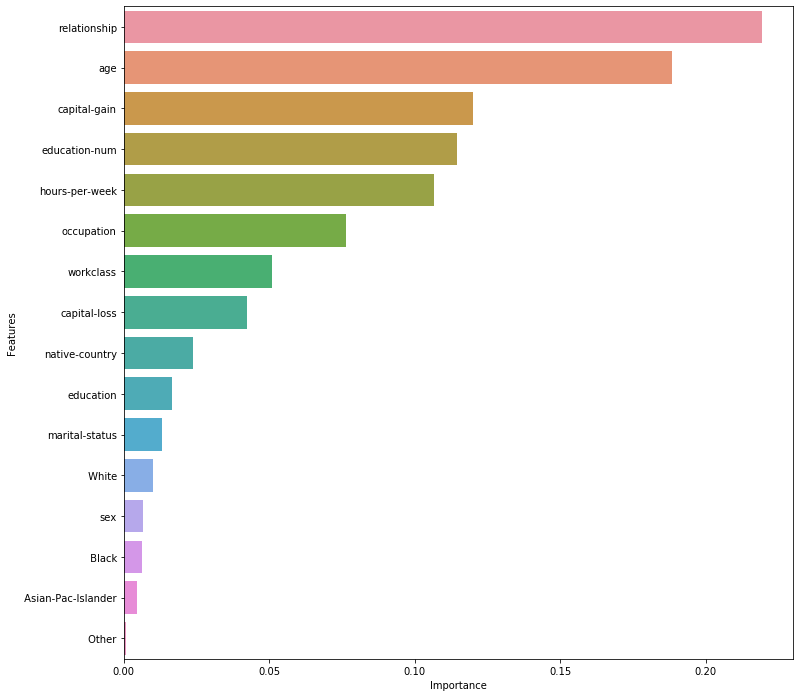

In [56]:
df_imp = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': dt_entropy.feature_importances_})
df_imp = df_imp.sort_values('Importance', ascending= False)
sns.barplot(x = 'Importance', y = 'Features', data = df_imp)

In [57]:
dt_entropy6 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, random_state = 10)
dt_entropy6.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=10)

In [58]:
dt6_feature = pd.DataFrame({'Feature':X_train.columns, 'Importance':dt_entropy6.feature_importances_ })

In [59]:
dt6_feature

,Feature,Importance
0,age,0.055762
1,education-num,0.197943
2,capital-gain,0.215059
3,capital-loss,0.048756
4,hours-per-week,0.025126
5,workclass,0.000613
6,education,0.000000
7,marital-status,0.000000
8,occupation,0.000642
9,relationship,0.456100


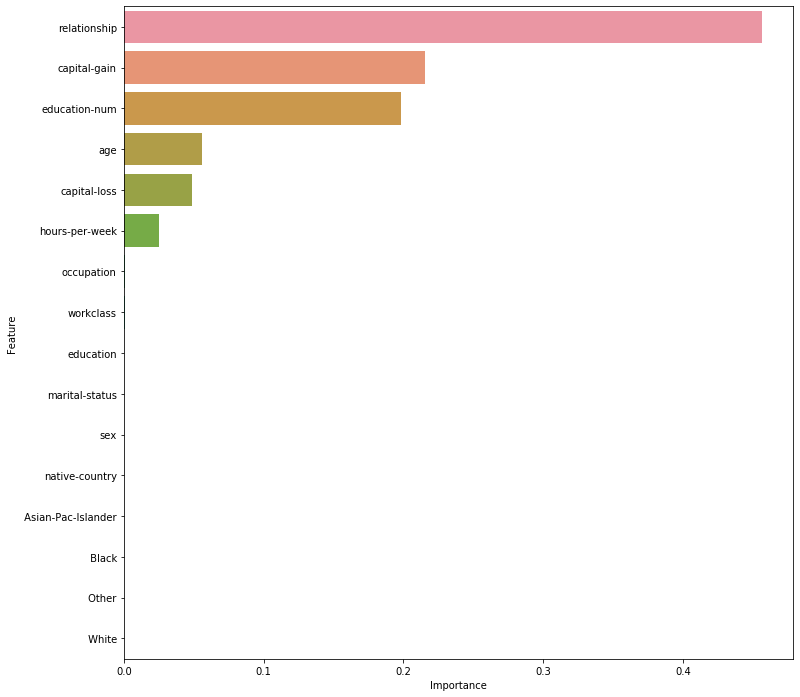

In [60]:
dt6_feature = dt6_feature.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y= 'Feature', data = dt6_feature )

In [61]:
dt_entropy

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [62]:
dt_entropy6

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=10)

In [63]:
y_pred  = dt_entropy.predict(X_test)
y_pred6 = dt_entropy6.predict(X_test)


In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(' Accuracy for FG Decision Tree - Training ', dt_entropy.score(X_train,y_train))
print(' Accuracy for FG Decision Tree - Test ', accuracy_score(y_test,y_pred))
print('---------')

print(' Accuracy for 6 level Decision Tree - Training ', dt_entropy6.score(X_train,y_train))
print(' Accuracy for 6 level Decision Tree - Test ', accuracy_score(y_test,y_pred6))


 Accuracy for FG Decision Tree - Training  0.974534845033655
 Accuracy for FG Decision Tree - Test  0.8178933360630566
---------
 Accuracy for 6 level Decision Tree - Training  0.856217848642285
 Accuracy for 6 level Decision Tree - Test  0.8476814412938888


In [65]:
#classification report
print(classification_report(y_test,y_pred))
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7388
           1       0.63      0.60      0.62      2381

    accuracy                           0.82      9769
   macro avg       0.75      0.74      0.75      9769
weighted avg       0.81      0.82      0.82      9769

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      7388
           1       0.78      0.53      0.63      2381

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.84      0.85      0.84      9769



In [66]:
#regularization
param = ({'criterion': ['entropy','gini'], 'max_depth': [3,5,7]})
dt = DecisionTreeClassifier(random_state=10)
grid_dt = GridSearchCV(dt, param_grid =param, cv= 5 )
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 7}


In [67]:
dt_entropy7 = DecisionTreeClassifier(criterion='gini', max_depth= 7)
dt_entropy7.fit(X_train, y_train)
y_pred7 = dt_entropy7.predict(X_test)

In [68]:

print(' Accuracy for 7 level Decision Tree - Training ', dt_entropy7.score(X_train,y_train))
print(' Accuracy for 7 level Decision Tree - Test ', accuracy_score(y_test,y_pred7))

 Accuracy for 7 level Decision Tree - Training  0.8597496992808333
 Accuracy for 7 level Decision Tree - Test  0.8495240045040434


In [69]:
#regularization
param = ({'criterion': ['entropy','gini'], 'max_depth':[3,5,7,],'min_samples_leaf': [3,5,10], 'min_samples_split':[3,5,10]})
dt = DecisionTreeClassifier(random_state=10)
grid_dt = GridSearchCV(dt, param_grid =param, cv= 5 )
grid_dt.fit(X_train,y_train)
print(grid_dt.best_params_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [70]:
dt_prune = DecisionTreeClassifier(criterion='gini', max_depth= 7, min_samples_leaf= 3, min_samples_split= 3, random_state = 10)
dt_prune.fit(X_train,y_train)
y_pred_prune = dt_prune.predict(X_test)

In [71]:

print(' Accuracy for 5 level Decision Tree - Training ', dt_prune.score(X_train,y_train))
print(' Accuracy for 5 level Decision Tree - Test ', accuracy_score(y_test,y_pred_prune))

 Accuracy for 5 level Decision Tree - Training  0.8595449543162798
 Accuracy for 5 level Decision Tree - Test  0.8495240045040434


In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(random_state = 1)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

In [74]:

print(' Accuracy for RF - Training ', rf.score(X_train,y_train))
print(' Accuracy for RF - Test ', accuracy_score(y_test,y_pred_rf))

 Accuracy for RF - Training  0.9744836587925165
 Accuracy for RF - Test  0.8469648889343843


In [75]:
rf50 = RandomForestClassifier(n_estimators=50,random_state = 1)
rf50.fit(X_train,y_train)
y_pred_rf50 = rf50.predict(X_test)

In [76]:

print(' Accuracy for RF - Training ', rf50.score(X_train,y_train))
print(' Accuracy for RF - Test ', accuracy_score(y_test,y_pred_rf50))

 Accuracy for RF - Training  0.9742533207073939
 Accuracy for RF - Test  0.8465554304432388


In [77]:
param = ({'criterion': ['entropy','gini'],'n_estimators':[50,60,70],'min_samples_leaf': [10,15,20]})
rf1 = RandomForestClassifier(random_state=10)
grid_rf = GridSearchCV(rf1, param_grid =param, cv= 5 )
grid_rf.fit(X_train,y_train)
print(grid_rf.best_params_)

{'criterion': 'gini', 'min_samples_leaf': 10, 'n_estimators': 60}


In [78]:
rfgini = RandomForestClassifier(criterion= 'gini',n_estimators=60,min_samples_leaf=10, random_state = 1)
rfgini.fit(X_train,y_train)
y_pred_gini = rfgini.predict(X_test)

In [79]:
print(' Accuracy for RF - Training ', rfgini.score(X_train,y_train))
print(' Accuracy for RF - Test ', accuracy_score(y_test,y_pred_gini))

 Accuracy for RF - Training  0.8778184424026821
 Accuracy for RF - Test  0.8573037158358071


In [80]:
rfgini.feature_importances_

array([9.03352453e-02, 1.46216025e-01, 2.13038018e-01, 5.13398986e-02,
       5.33286318e-02, 1.71773331e-02, 3.79001265e-02, 1.17628113e-01,
       4.52259692e-02, 2.05442498e-01, 1.30739385e-02, 5.00004837e-03,
       5.83161493e-04, 1.14600342e-03, 4.22438592e-05, 2.52274648e-03])

In [81]:
rf_feature = pd.DataFrame({'Feature':X_train.columns, 'Importance':rfgini.feature_importances_ })

In [82]:
rf_feature

,Feature,Importance
0,age,0.090335
1,education-num,0.146216
2,capital-gain,0.213038
3,capital-loss,0.051340
4,hours-per-week,0.053329
5,workclass,0.017177
6,education,0.037900
7,marital-status,0.117628
8,occupation,0.045226
9,relationship,0.205442


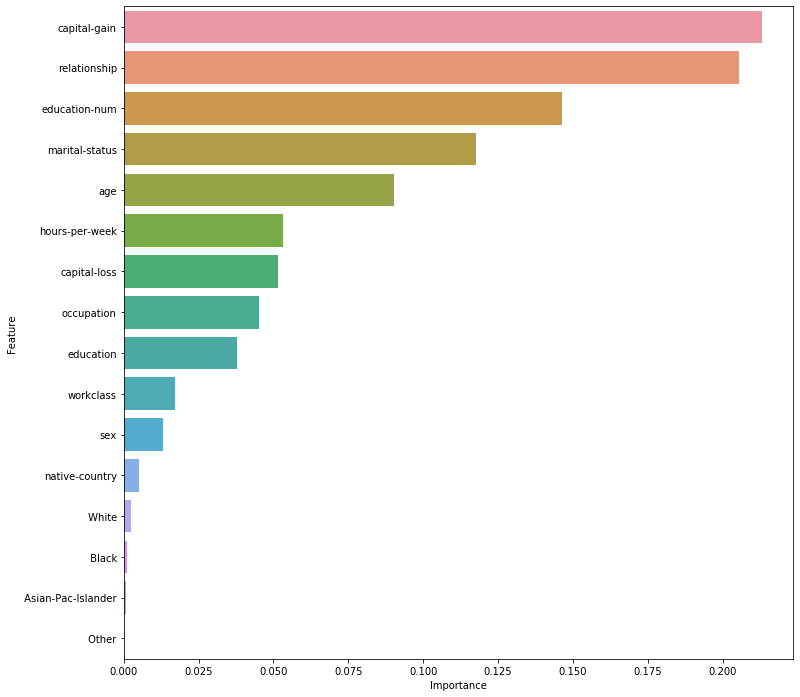

In [83]:
rf_feature = rf_feature.sort_values('Importance', ascending=False)
sns.barplot(x='Importance', y= 'Feature', data = rf_feature )

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [85]:
lr =LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [86]:
from sklearn.ensemble import BaggingClassifier

In [87]:
bag_lr  = BaggingClassifier(base_estimator = lr)
bag_knn = BaggingClassifier(base_estimator = knn)
bag_dt  = BaggingClassifier(base_estimator = dt)

In [88]:
lr.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)
bag_lr.fit(X_train,y_train)
bag_knn.fit(X_train,y_train)
bag_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [89]:
y_pred_lr = lr.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_bag_lr = bag_lr.predict(X_test)
y_pred_bag_knn = bag_knn.predict(X_test)
y_pred_bag_dt = bag_dt.predict(X_test)

In [90]:
print('Accuracy score of LR Model      ', accuracy_score(y_test, y_pred_lr))
print('Accuracy score of KNN Model     ', accuracy_score(y_test, y_pred_knn))
print('Accuracy score of DT Model       ', accuracy_score(y_test, y_pred_dt))
print('Accuracy score of Bag LR Model ', accuracy_score(y_test, y_pred_bag_lr))
print('Accuracy score of Bag KNN Model ', accuracy_score(y_test, y_pred_bag_knn))
print('Accuracy score of Bag DT  Model ', accuracy_score(y_test, y_pred_bag_dt))

Accuracy score of LR Model       0.8001842563210154
Accuracy score of KNN Model      0.8407206469444161
Accuracy score of DT Model        0.8176886068174839
Accuracy score of Bag LR Model  0.8002866209438019
Accuracy score of Bag KNN Model  0.8432797625140751
Accuracy score of Bag DT  Model  0.8434844917596479


In [91]:

bag_dt1  = BaggingClassifier(n_estimators = 20, base_estimator = dt, oob_score=True, random_state=100)

In [92]:
bag_dt1.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=20,
                  oob_score=True, random_state=100)

In [93]:
bag_dt1.oob_score_

0.8421928185703683

In [94]:
y_pred_bag_dt1 = bag_dt.predict(X_test)

In [95]:
accuracy_score(y_test, y_pred_bag_dt1)

0.8434844917596479

In [96]:
from sklearn.ensemble import AdaBoostClassifier

In [97]:
abcl = AdaBoostClassifier(random_state=100)
abcl.fit(X_train, y_train)
y_predict_abcl = abcl.predict(X_test)

In [98]:
accuracy_score(y_test, y_predict_abcl)

0.8530044016787798

In [99]:
print('Training accuracy: ' , abcl.score(X_train, y_train))

Training accuracy:  0.8625393494228751


In [100]:
print('Testing accuracy: ' , abcl.score(X_test, y_test))
print('Testing accuracy: ' , accuracy_score(y_test, y_predict_abcl))


Testing accuracy:  0.8530044016787798
Testing accuracy:  0.8530044016787798


In [101]:
lr =LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [102]:
abcl_lr = AdaBoostClassifier(base_estimator = lr, random_state=100)
abcl_knn = AdaBoostClassifier(base_estimator = knn, random_state=100)
abcl_dt = AdaBoostClassifier(base_estimator = dt, random_state=100)


In [103]:
abcl_lr.fit(X_train, y_train)
#abcl_knn.fit(X_train, y_train)
abcl_dt.fit(X_train, y_train)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=100)

In [104]:

y_predict_abcl_lr = abcl_lr.predict(X_test)
y_predict_abcl_dt = abcl_dt.predict(X_test)

In [105]:
print('Training accuracy for LR: ' , abcl_lr.score(X_train, y_train))
print('Testing accuracy for LR: ' , accuracy_score(y_test, y_predict_abcl_lr))
print('------------')
print('Training accuracy for DT: ' , abcl_dt.score(X_train, y_train))
print('Testing accuracy for DT: ' , accuracy_score(y_test, y_predict_abcl_dt))


Training accuracy for LR:  0.8044685588513808
Testing accuracy for LR:  0.8035622888729655
------------
Training accuracy for DT:  0.974534845033655
Testing accuracy for DT:  0.8367284266557478


In [106]:
param = {'n_estimators' : [200,250,300]}
ab = AdaBoostClassifier( random_state=100)
ab_grid = GridSearchCV(estimator = ab,param_grid = param, cv=3, scoring = 'accuracy' )
ab_grid.fit(X_train, y_train)
print(ab_grid.best_params_)

{'n_estimators': 300}


In [107]:
ab_300 =AdaBoostClassifier(n_estimators=300, random_state=100)
ab_300.fit(X_train, y_train)

y_predict_ab300 = ab_300.predict(X_test)
print('Training accuracy for Adaboost 300 estimators: ' , ab_300.score(X_train, y_train))
print('Testing accuracy for Adaboost 300 estimators: ' , accuracy_score(y_test, y_predict_ab300))

Training accuracy for Adaboost 300 estimators:  0.870959486090139
Testing accuracy for Adaboost 300 estimators:  0.8642645101852799


In [108]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
gbcl = GradientBoostingClassifier(n_estimators =11, random_state=100)

In [110]:
gbcl.fit(X_train, y_train)


GradientBoostingClassifier(n_estimators=11, random_state=100)

In [111]:
y_predict_gbcl= gbcl.predict(X_test)
print('Training accuracy for Gradient Boost 20 estimators: ' , gbcl.score(X_train, y_train))
print('Testing accuracy for Gradient Boost 20 estimators: ' , accuracy_score(y_test, y_predict_gbcl))

Training accuracy for Gradient Boost 20 estimators:  0.8444450131804571
Testing accuracy for Gradient Boost 20 estimators:  0.8374449790152523


In [112]:
param = {'n_estimators' : [100,200]}
gb = GradientBoostingClassifier( random_state=100)
gb_grid = GridSearchCV(estimator = gb,param_grid = param, cv=3, scoring = 'accuracy' )
gb_grid.fit(X_train, y_train)
print(gb_grid.best_params_)

{'n_estimators': 200}


In [113]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=5)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:

y_predict_xgb= xgb.predict(X_test)
print('Training accuracy for XGB 20 estimators: ' , xgb.score(X_train, y_train))
print('Testing accuracy for XGB Boost 20 estimators: ' , accuracy_score(y_test, y_predict_xgb))

Training accuracy for XGB 20 estimators:  0.8620786732526297
Testing accuracy for XGB Boost 20 estimators:  0.8514689323369843


In [115]:
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

In [116]:
# define the base models
level_0 = list()
level_0.append(('lr', LogisticRegression()))
level_0.append(('knn', KNeighborsClassifier()))
level_0.append(('cart', DecisionTreeClassifier()))
level_0.append(('bayes', GaussianNB()))

# define meta learner model
level_1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level_0, final_estimator=level_1, cv=5)

In [117]:
model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

In [118]:

y_predict_stack= model.predict(X_test)
print('Training accuracy for Stacking: ' , model.score(X_train, y_train))
print('Testing accuracy for Stacking: ' , accuracy_score(y_test, y_predict_stack))

Training accuracy for Stacking:  0.9111406853837688
Testing accuracy for Stacking:  0.8522878493192753


In [119]:
from sklearn.ensemble import VotingClassifier

In [120]:
# Voting Classifier with hard voting 
vote_hard = VotingClassifier(estimators = level_0, voting ='hard') 
vote_hard.fit(X_train, y_train) 
y_pred_vote_hard = vote_hard.predict(X_test) 

In [121]:

print('Training accuracy for Voting Hard: ' , vote_hard.score(X_train, y_train))
print('Testing accuracy for Voting Hard: ' , accuracy_score(y_test, y_pred_vote_hard))

Training accuracy for Voting Hard:  0.8510224451667392
Testing accuracy for Voting Hard:  0.8327362063670796


In [122]:
# Voting Classifier with soft voting 
vote_soft = VotingClassifier(estimators = level_0, voting ='soft') 
vote_soft.fit(X_train, y_train) 
y_pred_vote_soft = vote_soft.predict(X_test) 

In [123]:

print('Training accuracy for Voting Soft: ' , vote_soft.score(X_train, y_train))
print('Testing accuracy for Voting Soft: ' , accuracy_score(y_test, y_pred_vote_soft))

Training accuracy for Voting Soft:  0.9059708750287923
Testing accuracy for Voting Soft:  0.8442010441191524
